In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily
import geopandas
from shapely.geometry import Point

In [151]:
df_restaurants=pd.read_csv(r"D:\Data\Paris\paris_restaurants.csv")
df_restaurants

type              x             y
0                    European restuarant  259641.691646  6.251867e+06
1          Traditional French restaurant  259572.339603  6.252030e+06
2          Traditional French restaurant  259657.276374  6.252143e+06
3     Indian / Middle Eastern restaurant  259684.438330  6.252203e+06
4          Traditional French restaurant  259597.943086  6.252230e+06
...                                  ...            ...           ...
5730                    Asian restaurant  259415.267801  6.253554e+06
5731                 European restuarant  259039.341881  6.253967e+06
5732                    Asian restaurant  267737.067655  6.251037e+06
5733               Maghrebian restaurant  267811.874353  6.250977e+06
5734               Maghrebian restaurant  268032.954862  6.249938e+06

[5735 rows x 3 columns]

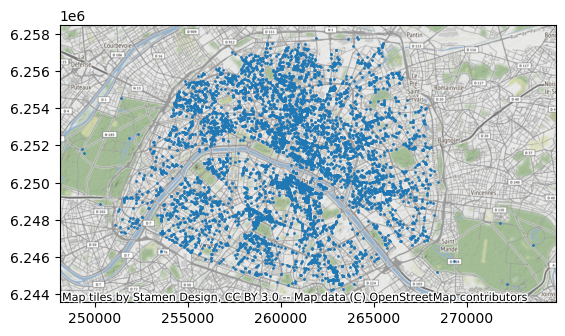

In [152]:
fig, ax = plt.subplots()
ax.plot(df_restaurants["x"],df_restaurants["y"], 'o',markersize=1)
contextily.add_basemap(ax)
plt.show()

In [174]:
districts=geopandas.read_file(r"D:\Data\Paris\paris_districts_utm.geojson")
districts

id           district_name  population  \
0    1  St-Germain-l'Auxerrois        1672   
1    2                  Halles        8984   
2    3            Palais-Royal        3195   
3    4           Place-Vendôme        3044   
4    5                 Gaillon        1345   
..  ..                     ...         ...   
75  76                  Combat       38988   
76  77              Belleville       35773   
77  78           Saint-Fargeau       42087   
78  79           Père-Lachaise       42332   
79  80                Charonne       62901   

                                             geometry  
0   POLYGON ((451922.13339 5411438.48436, 451922.0...  
1   POLYGON ((452278.41940 5412160.89282, 452192.4...  
2   POLYGON ((451553.80577 5412340.52222, 451528.0...  
3   POLYGON ((451004.90794 5412654.09491, 450960.6...  
4   POLYGON ((451328.75227 5412991.27816, 451294.7...  
..                                                ...  
75  POLYGON ((455155.12842 5414359.41283, 455239.3...  
76  POLYGON ((454767.85346 5412865.18844, 454761.1...  
77  POLYGON ((457014.14519 5413260.15446, 457015.1...  
78  POLYGON ((455648.39187 5411702.05438, 455580.6...  
79  POLYGON ((457155.51077 5410584.12681, 457153.3...  

[80 rows x 4 columns]

In [179]:
eiffel_tower = Point(255422.6, 6250868.9)

# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

0    False
1    False
2    False
3    False
4    False
dtype: bool


In [189]:
districts[districts.geometry.contains(eiffel_tower)]

Empty GeoDataFrame
Columns: [id, district_name, population, geometry]
Index: []

In [183]:
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(eiffel_tower.distance(resto))

False
False
4431.459825587062


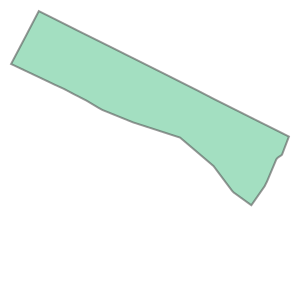

In [154]:
districts.geometry[0]

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

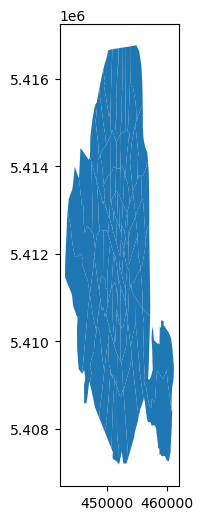

In [173]:
plt.figure()
districts.plot(figsize=(12,6))

In [59]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [60]:
districts.district_name.unique()

array(["St-Germain-l'Auxerrois", 'Halles', 'Palais-Royal',
       'Place-Vendôme', 'Gaillon', 'Vivienne', 'Mail', 'Bonne-Nouvelle',
       'Arts-et-Metiers', 'Enfants-Rouges', 'Archives', 'Sainte-Avoie',
       'Saint-Merri', 'Saint-Gervais', 'Arsenal', 'Notre-Dame',
       'Saint-Victor', 'Jardin-des-Plantes', 'Val-de-Grace', 'Sorbonne',
       'Monnaie', 'Odeon', 'Notre-Dame-des-Champs',
       'Saint-Germain-des-Prés', "Saint-Thomas-d'Aquin", 'Invalides',
       'Ecole-Militaire', 'Gros-Caillou', 'Champs-Elysées',
       'Faubourg-du-Roule', 'Madeleine', 'Europe', 'Saint-Georges',
       "Chaussée-d'Antin", 'Faubourg-Montmartre', 'Rochechouart',
       'Saint-Vincent-de-Paul', 'Porte-Saint-Denis', 'Porte-Saint-Martin',
       'Hôpital-Saint-Louis', 'Folie-Méricourt', 'Saint-Ambroise',
       'Roquette', 'Sainte-Marguerite', 'Bel-Air', 'Picpus', 'Bercy',
       'Quinze-Vingts', 'Salpêtrière', 'Gare', 'Maison-Blanche',
       'Croulebarbe', 'Montparnasse', 'Parc-de-Montsouris',
      

In [61]:
districts[districts["district_name"]=='Notre-Dame']

id district_name  population  \
15  16    Notre-Dame        4087   

                                             geometry  
15  POLYGON ((453143.55436 5410820.04355, 453157.9...

In [80]:
districts.geometry.area

C:\Users\Nevra\AppData\Local\Temp\ipykernel_3052\3082656400.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts.geometry.area


0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [62]:
restaurants=geopandas.GeoDataFrame(df_restaurants,geometry=geopandas.points_from_xy(df_restaurants.x,df_restaurants.y))
restaurants

type              x             y  \
0                    European restuarant  259641.691646  6.251867e+06   
1          Traditional French restaurant  259572.339603  6.252030e+06   
2          Traditional French restaurant  259657.276374  6.252143e+06   
3     Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4          Traditional French restaurant  259597.943086  6.252230e+06   
...                                  ...            ...           ...   
5730                    Asian restaurant  259415.267801  6.253554e+06   
5731                 European restuarant  259039.341881  6.253967e+06   
5732                    Asian restaurant  267737.067655  6.251037e+06   
5733               Maghrebian restaurant  267811.874353  6.250977e+06   
5734               Maghrebian restaurant  268032.954862  6.249938e+06   

                            geometry  
0     POINT (259641.692 6251867.063)  
1     POINT (259572.340 6252029.683)  
2     POINT (259657.276 6252143.401)  
3     POINT (259684.438 6252203.137)  
4     POINT (259597.943 6252230.044)  
...                              ...  
5730  POINT (259415.268 6253553.831)  
5731  POINT (259039.342 6253966.817)  
5732  POINT (267737.068 6251037.256)  
5733  POINT (267811.874 6250976.682)  
5734  POINT (268032.955 6249938.191)  

[5735 rows x 4 columns]

In [63]:
restaurants[:1]

type              x             y  \
0  European restuarant  259641.691646  6.251867e+06   

                         geometry  
0  POINT (259641.692 6251867.063)

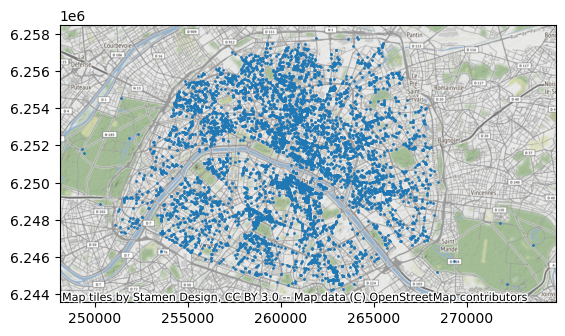

In [64]:
ax=restaurants.plot(markersize=1)
contextily.add_basemap(ax)

In [65]:
restaurants["type"]

0                      European restuarant
1            Traditional French restaurant
2            Traditional French restaurant
3       Indian / Middle Eastern restaurant
4            Traditional French restaurant
                       ...                
5730                      Asian restaurant
5731                   European restuarant
5732                      Asian restaurant
5733                 Maghrebian restaurant
5734                 Maghrebian restaurant
Name: type, Length: 5735, dtype: object

In [66]:
restaurants["type"]=restaurants["type"].astype("category")

In [67]:
restaurants["type"]

0                      European restuarant
1            Traditional French restaurant
2            Traditional French restaurant
3       Indian / Middle Eastern restaurant
4            Traditional French restaurant
                       ...                
5730                      Asian restaurant
5731                   European restuarant
5732                      Asian restaurant
5733                 Maghrebian restaurant
5734                 Maghrebian restaurant
Name: type, Length: 5735, dtype: category
Categories (9, object): ['African restaurant', 'Asian restaurant', 'Caribbean restaurant', 'Central and South American restuarant', ..., 'Indian / Middle Eastern restaurant', 'Maghrebian restaurant', 'Other world restaurant', 'Traditional French restaurant']

In [68]:
restaurants_types=restaurants["type"].to_frame()
restaurants_types

type
0                    European restuarant
1          Traditional French restaurant
2          Traditional French restaurant
3     Indian / Middle Eastern restaurant
4          Traditional French restaurant
...                                  ...
5730                    Asian restaurant
5731                 European restuarant
5732                    Asian restaurant
5733               Maghrebian restaurant
5734               Maghrebian restaurant

[5735 rows x 1 columns]

Text(0, 0.5, '')

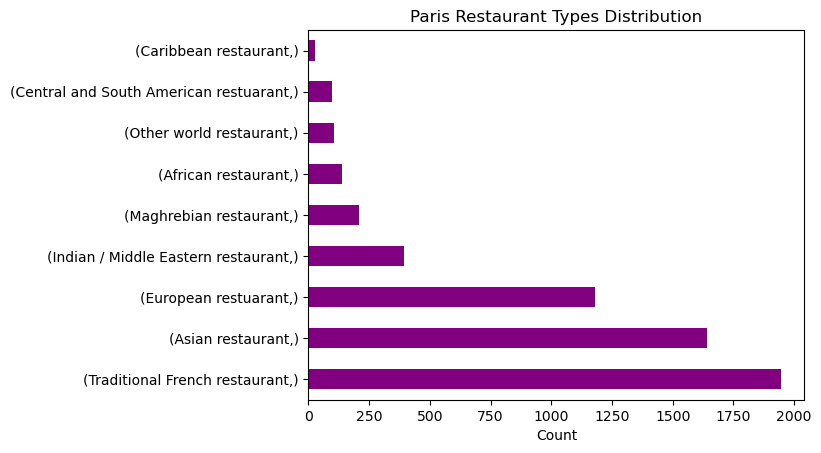

In [69]:
restaurants_types.value_counts().plot(kind="barh",color="purple",title="Paris Restaurant Types Distribution")
plt.xlabel("Count")
plt.ylabel("")

In [70]:
restaurants

type              x             y  \
0                    European restuarant  259641.691646  6.251867e+06   
1          Traditional French restaurant  259572.339603  6.252030e+06   
2          Traditional French restaurant  259657.276374  6.252143e+06   
3     Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4          Traditional French restaurant  259597.943086  6.252230e+06   
...                                  ...            ...           ...   
5730                    Asian restaurant  259415.267801  6.253554e+06   
5731                 European restuarant  259039.341881  6.253967e+06   
5732                    Asian restaurant  267737.067655  6.251037e+06   
5733               Maghrebian restaurant  267811.874353  6.250977e+06   
5734               Maghrebian restaurant  268032.954862  6.249938e+06   

                            geometry  
0     POINT (259641.692 6251867.063)  
1     POINT (259572.340 6252029.683)  
2     POINT (259657.276 6252143.401)  
3     POINT (259684.438 6252203.137)  
4     POINT (259597.943 6252230.044)  
...                              ...  
5730  POINT (259415.268 6253553.831)  
5731  POINT (259039.342 6253966.817)  
5732  POINT (267737.068 6251037.256)  
5733  POINT (267811.874 6250976.682)  
5734  POINT (268032.955 6249938.191)  

[5735 rows x 4 columns]

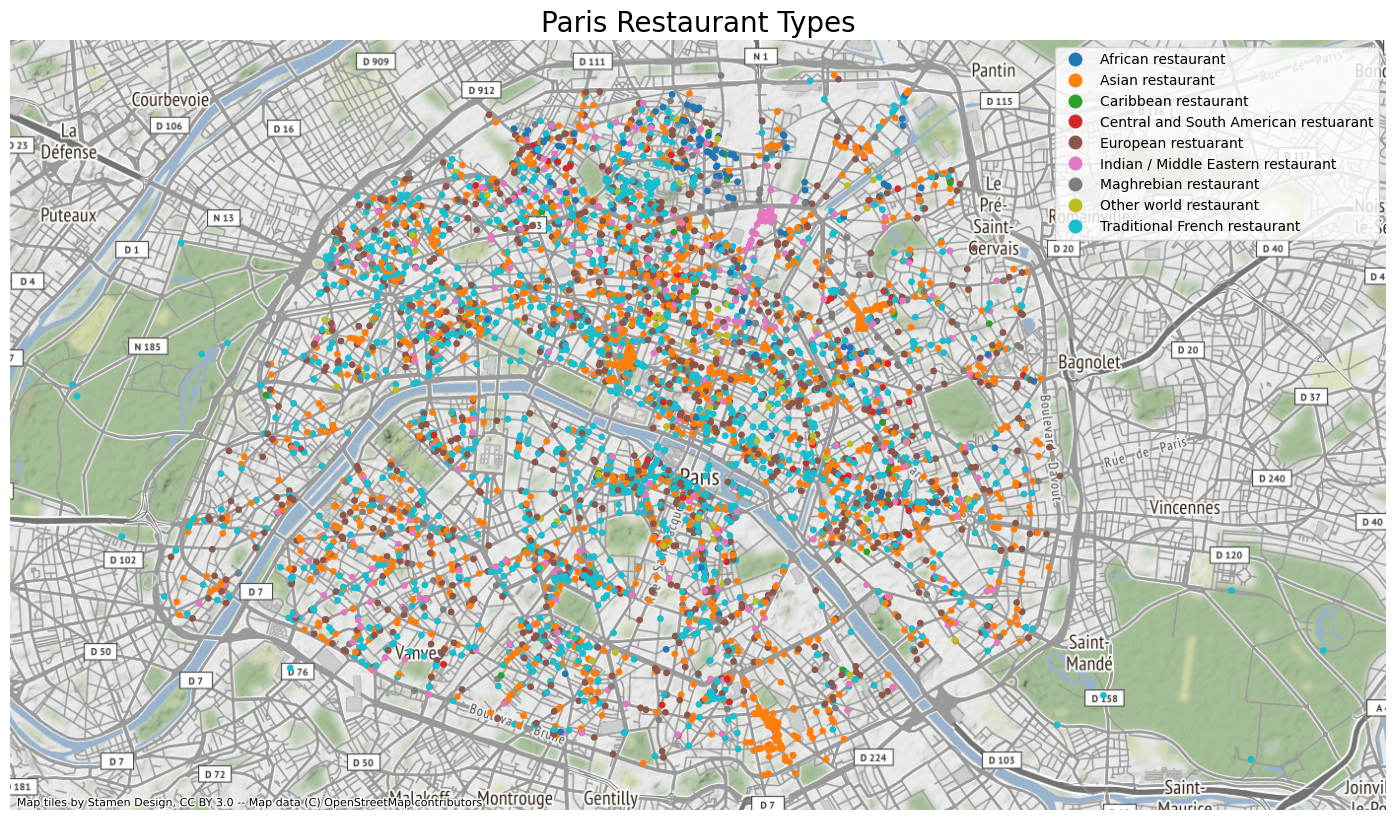

In [71]:
ax=restaurants.plot(column="type",markersize=15,figsize=(20,10),legend=True)
contextily.add_basemap(ax)
plt.title("Paris Restaurant Types",size=20)
ax.set_axis_off()

In [72]:
restaurants.groupby("type").count()

x     y  geometry
type                                                       
African restaurant                      138   138       138
Asian restaurant                       1642  1642      1642
Caribbean restaurant                     27    27        27
Central and South American restuarant    97    97        97
European restuarant                    1178  1178      1178
Indian / Middle Eastern restaurant      394   394       394
Maghrebian restaurant                   207   207       207
Other world restaurant                  107   107       107
Traditional French restaurant          1945  1945      1945

In [73]:
african_restaurants=restaurants[restaurants["type"]=="African restaurant"]
african_restaurants

type              x             y  \
191   African restaurant  262927.063778  6.256353e+06   
194   African restaurant  263086.918566  6.256656e+06   
273   African restaurant  262051.424663  6.255859e+06   
274   African restaurant  262171.872352  6.256198e+06   
275   African restaurant  262061.443417  6.256270e+06   
...                  ...            ...           ...   
5547  African restaurant  260757.669541  6.257185e+06   
5565  African restaurant  262420.560094  6.253007e+06   
5569  African restaurant  261203.726741  6.256914e+06   
5630  African restaurant  263511.713743  6.255576e+06   
5674  African restaurant  261615.608856  6.256319e+06   

                            geometry  
191   POINT (262927.064 6256353.387)  
194   POINT (263086.919 6256656.454)  
273   POINT (262051.425 6255859.022)  
274   POINT (262171.872 6256197.625)  
275   POINT (262061.443 6256270.088)  
...                              ...  
5547  POINT (260757.670 6257185.070)  
5565  POINT (262420.560 6253007.164)  
5569  POINT (261203.727 6256913.647)  
5630  POINT (263511.714 6255576.298)  
5674  POINT (261615.609 6256318.849)  

[138 rows x 4 columns]

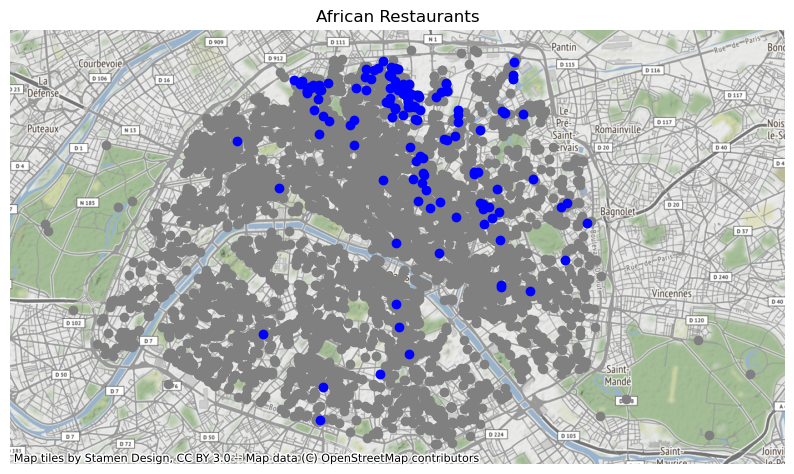

In [74]:
fig,ax=plt.subplots(figsize=(10,10))
restaurants.plot(ax=ax,color="grey")
african_restaurants.plot(ax=ax,color="blue")
plt.title("African Restaurants")
ax.set_axis_off()
contextily.add_basemap(ax)


In [99]:
eiffel_tower = Point(255422.6, 6250868.9)

In [107]:
districts.loc[52]

id                                                              53
district_name                                         Montparnasse
population                                                   18570
geometry         POLYGON ((451682.9664974161 5409302.09231395, ...
Name: 52, dtype: object

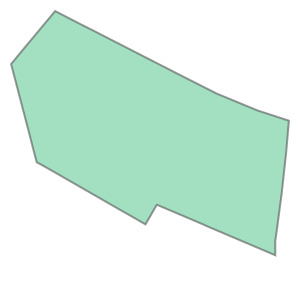

In [108]:
district_montparnasse = districts.loc[52, 'geometry']
district_montparnasse

In [109]:
restaurants.loc[956]

type                      Traditional French restaurant
x                                         258904.200019
y                                        6248127.313326
geometry    POINT (258904.2000192164 6248127.313325831)
Name: 956, dtype: object

In [113]:
resto = restaurants.loc[956, 'geometry']
print(resto)

POINT (258904.2000192164 6248127.313325831)


In [121]:
eiffel_tower.within(district_montparnasse)

False

In [136]:
districts.district_name.unique()

array(["St-Germain-l'Auxerrois", 'Halles', 'Palais-Royal',
       'Place-Vendôme', 'Gaillon', 'Vivienne', 'Mail', 'Bonne-Nouvelle',
       'Arts-et-Metiers', 'Enfants-Rouges', 'Archives', 'Sainte-Avoie',
       'Saint-Merri', 'Saint-Gervais', 'Arsenal', 'Notre-Dame',
       'Saint-Victor', 'Jardin-des-Plantes', 'Val-de-Grace', 'Sorbonne',
       'Monnaie', 'Odeon', 'Notre-Dame-des-Champs',
       'Saint-Germain-des-Prés', "Saint-Thomas-d'Aquin", 'Invalides',
       'Ecole-Militaire', 'Gros-Caillou', 'Champs-Elysées',
       'Faubourg-du-Roule', 'Madeleine', 'Europe', 'Saint-Georges',
       "Chaussée-d'Antin", 'Faubourg-Montmartre', 'Rochechouart',
       'Saint-Vincent-de-Paul', 'Porte-Saint-Denis', 'Porte-Saint-Martin',
       'Hôpital-Saint-Louis', 'Folie-Méricourt', 'Saint-Ambroise',
       'Roquette', 'Sainte-Marguerite', 'Bel-Air', 'Picpus', 'Bercy',
       'Quinze-Vingts', 'Salpêtrière', 'Gare', 'Maison-Blanche',
       'Croulebarbe', 'Montparnasse', 'Parc-de-Montsouris',
      

In [128]:
districts.district_name.unique()

array(["St-Germain-l'Auxerrois", 'Halles', 'Palais-Royal',
       'Place-Vendôme', 'Gaillon', 'Vivienne', 'Mail', 'Bonne-Nouvelle',
       'Arts-et-Metiers', 'Enfants-Rouges', 'Archives', 'Sainte-Avoie',
       'Saint-Merri', 'Saint-Gervais', 'Arsenal', 'Notre-Dame',
       'Saint-Victor', 'Jardin-des-Plantes', 'Val-de-Grace', 'Sorbonne',
       'Monnaie', 'Odeon', 'Notre-Dame-des-Champs',
       'Saint-Germain-des-Prés', "Saint-Thomas-d'Aquin", 'Invalides',
       'Ecole-Militaire', 'Gros-Caillou', 'Champs-Elysées',
       'Faubourg-du-Roule', 'Madeleine', 'Europe', 'Saint-Georges',
       "Chaussée-d'Antin", 'Faubourg-Montmartre', 'Rochechouart',
       'Saint-Vincent-de-Paul', 'Porte-Saint-Denis', 'Porte-Saint-Martin',
       'Hôpital-Saint-Louis', 'Folie-Méricourt', 'Saint-Ambroise',
       'Roquette', 'Sainte-Marguerite', 'Bel-Air', 'Picpus', 'Bercy',
       'Quinze-Vingts', 'Salpêtrière', 'Gare', 'Maison-Blanche',
       'Croulebarbe', 'Montparnasse', 'Parc-de-Montsouris',
      

In [127]:
districts[districts.district_name=="Palais Bourbon"]

Empty GeoDataFrame
Columns: [id, district_name, population, geometry]
Index: []

In [123]:
district_montparnasse.contains(resto)

False

In [149]:
districts

id           district_name  population  \
0    1  St-Germain-l'Auxerrois        1672   
1    2                  Halles        8984   
2    3            Palais-Royal        3195   
3    4           Place-Vendôme        3044   
4    5                 Gaillon        1345   
..  ..                     ...         ...   
75  76                  Combat       38988   
76  77              Belleville       35773   
77  78           Saint-Fargeau       42087   
78  79           Père-Lachaise       42332   
79  80                Charonne       62901   

                                             geometry  
0   POLYGON ((451922.13339 5411438.48436, 451922.0...  
1   POLYGON ((452278.41940 5412160.89282, 452192.4...  
2   POLYGON ((451553.80577 5412340.52222, 451528.0...  
3   POLYGON ((451004.90794 5412654.09491, 450960.6...  
4   POLYGON ((451328.75227 5412991.27816, 451294.7...  
..                                                ...  
75  POLYGON ((455155.12842 5414359.41283, 455239.3...  
76  POLYGON ((454767.85346 5412865.18844, 454761.1...  
77  POLYGON ((457014.14519 5413260.15446, 457015.1...  
78  POLYGON ((455648.39187 5411702.05438, 455580.6...  
79  POLYGON ((457155.51077 5410584.12681, 457153.3...  

[80 rows x 4 columns]

In [139]:
eiffel_tower = Point(255422.6, 6250868.9)

In [148]:
print(districts[districts.contains(eiffel_tower)])

Empty GeoDataFrame
Columns: [id, district_name, population, geometry]
Index: []


In [144]:
districts[districts.district_name=="Gros-Caillou"]

id district_name  population  \
27  28  Gros-Caillou       25156   

                                             geometry  
27  POLYGON ((449350.99731 5411450.75238, 449125.1...

In [147]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [192]:
restaurants

type              x             y  \
0                    European restuarant  259641.691646  6.251867e+06   
1          Traditional French restaurant  259572.339603  6.252030e+06   
2          Traditional French restaurant  259657.276374  6.252143e+06   
3     Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4          Traditional French restaurant  259597.943086  6.252230e+06   
...                                  ...            ...           ...   
5730                    Asian restaurant  259415.267801  6.253554e+06   
5731                 European restuarant  259039.341881  6.253967e+06   
5732                    Asian restaurant  267737.067655  6.251037e+06   
5733               Maghrebian restaurant  267811.874353  6.250977e+06   
5734               Maghrebian restaurant  268032.954862  6.249938e+06   

                            geometry  
0     POINT (259641.692 6251867.063)  
1     POINT (259572.340 6252029.683)  
2     POINT (259657.276 6252143.401)  
3     POINT (259684.438 6252203.137)  
4     POINT (259597.943 6252230.044)  
...                              ...  
5730  POINT (259415.268 6253553.831)  
5731  POINT (259039.342 6253966.817)  
5732  POINT (267737.068 6251037.256)  
5733  POINT (267811.874 6250976.682)  
5734  POINT (268032.955 6249938.191)  

[5735 rows x 4 columns]

In [201]:
# The distance from each restaurant to the Eiffel Tower
# meters
dist_eiffel=restaurants.distance(eiffel_tower)
dist_eiffel

0        4335.557972
1        4309.031947
2        4422.311235
3        4465.809553
4        4391.605984
            ...     
5730     4811.470985
5731     4762.133041
5732    12315.618429
5733    12389.743172
5734    12644.653747
Length: 5735, dtype: float64

<AxesSubplot:title={'center':'Distance Distribution of Restaurants to Eiffel'}, ylabel='Frequency'>

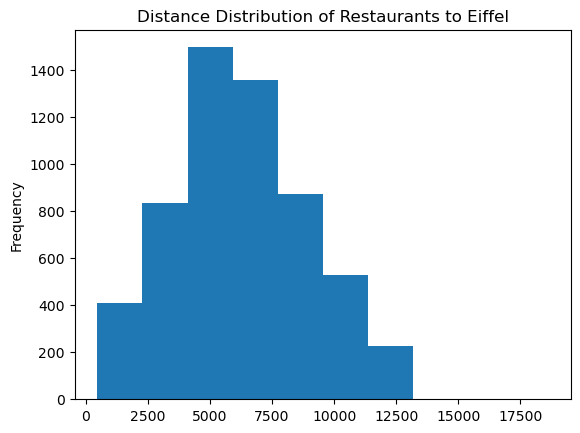

In [202]:
dist_eiffel.plot(kind="hist",title="Distance Distribution of Restaurants to Eiffel")

In [198]:
dist_eiffel.describe()

count     5735.000000
mean      6253.061977
std       2703.862748
min        460.697603
25%       4404.893303
50%       6025.144530
75%       8114.474851
max      18619.474577
dtype: float64

In [200]:
# The distance to the closest restaurant
dist_eiffel.min()

460.69760282781715

In [208]:
# The restaurants for closer than 1 km
restaurants_near_eiffel=restaurants[dist_eiffel<1000]
restaurants_near_eiffel

type              x             y  \
446           Traditional French restaurant  254647.120052  6.250868e+06   
929           Traditional French restaurant  255580.867941  6.251808e+06   
1529                    European restuarant  256321.810472  6.250516e+06   
1781                   Caribbean restaurant  256282.737331  6.250657e+06   
1783                    European restuarant  256355.874236  6.250517e+06   
1785          Traditional French restaurant  255710.109870  6.250069e+06   
1786                       Asian restaurant  255482.684150  6.250308e+06   
1787          Traditional French restaurant  255871.411812  6.251051e+06   
1788     Indian / Middle Eastern restaurant  256112.307190  6.251175e+06   
1789          Traditional French restaurant  256393.388904  6.250657e+06   
1790          Traditional French restaurant  256238.877451  6.250834e+06   
2143                       Asian restaurant  256135.016366  6.250777e+06   
2144                    European restuarant  256104.292187  6.250760e+06   
2145     Indian / Middle Eastern restaurant  256296.540947  6.250627e+06   
2294                    European restuarant  256065.886962  6.251111e+06   
2295                       Asian restaurant  256043.511745  6.251104e+06   
2296          Traditional French restaurant  256100.396005  6.251276e+06   
2299          Traditional French restaurant  256283.293928  6.250858e+06   
2449                    European restuarant  256012.230968  6.250807e+06   
2450          Traditional French restaurant  256078.911343  6.251011e+06   
2451                    European restuarant  256078.911343  6.251011e+06   
2452          Traditional French restaurant  255871.411812  6.251051e+06   
2454          Traditional French restaurant  256360.660974  6.250731e+06   
2455          Traditional French restaurant  256283.293928  6.250858e+06   
2456          Traditional French restaurant  256238.877451  6.250834e+06   
2457          Traditional French restaurant  256314.686024  6.250875e+06   
2658                    European restuarant  256167.521658  6.251039e+06   
2675                    European restuarant  256088.818778  6.250751e+06   
2676          Traditional French restaurant  256324.036862  6.250569e+06   
4007                       Asian restaurant  255661.574572  6.249964e+06   
4008                    European restuarant  254857.736529  6.250158e+06   
4256          Traditional French restaurant  255490.031237  6.250036e+06   
4344                       Asian restaurant  255537.453340  6.250016e+06   
4345          Traditional French restaurant  255464.539073  6.250198e+06   
4346          Traditional French restaurant  255486.691652  6.250247e+06   
4475          Traditional French restaurant  255324.499154  6.250006e+06   
4532                 Other world restaurant  255580.979261  6.251704e+06   
4644                    European restuarant  255486.691652  6.250247e+06   
4645                    European restuarant  255598.122462  6.250138e+06   
4646                       Asian restaurant  254926.420655  6.250053e+06   
4647     Indian / Middle Eastern restaurant  254954.473166  6.250010e+06   
5005                       Asian restaurant  256290.084417  6.251268e+06   
5027                       Asian restaurant  256038.502368  6.250813e+06   
5028                    European restuarant  256126.778724  6.251245e+06   
5030          Traditional French restaurant  256219.062582  6.250792e+06   
5031          Traditional French restaurant  256316.467136  6.250828e+06   
5032                       Asian restaurant  256368.230699  6.250714e+06   
5050                       Asian restaurant  255856.383681  6.251024e+06   
5051          Traditional French restaurant  255953.342957  6.251076e+06   
5052          Traditional French restaurant  256106.629896  6.251147e+06   
5053  Central and South American restuarant  256316.467136  6.250828e+06   
5181                    European restuarant  254828.014225  6.250224e+06   

          

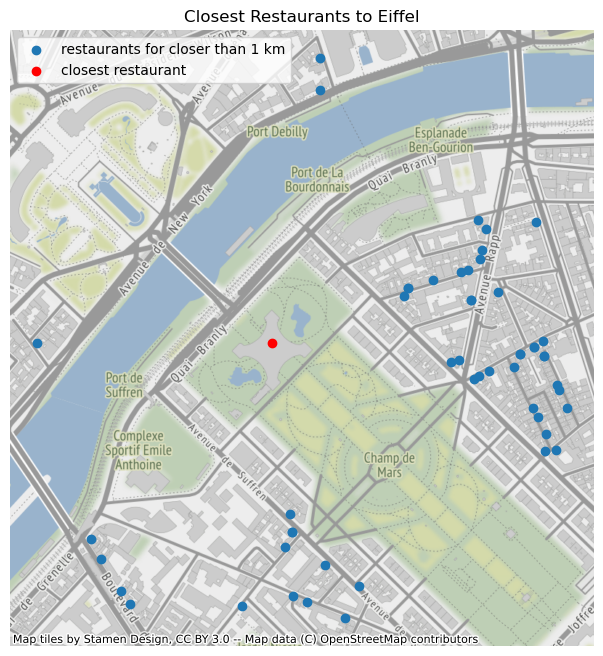

In [257]:
ax=restaurants_near_eiffel.plot(figsize=(16,8))
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax,color="red")
contextily.add_basemap(ax=ax)
ax.set_axis_off()
plt.title("Closest Restaurants to Eiffel")
plt.legend(["restaurants for closer than 1 km","closest restaurant"])
